# Traffic Signs Recognition based on PYNQ-Z2

# 测试

In [1]:
import cnn
from pynq import Overlay, GPIO, Register
import cv2
from matplotlib import pyplot as plt
import numpy as np
from pynq.lib import AxiGPIO

* 调用cnn库

In [2]:
cnn.initial()

Overlay download finish
Finish initial


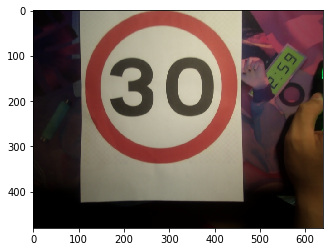

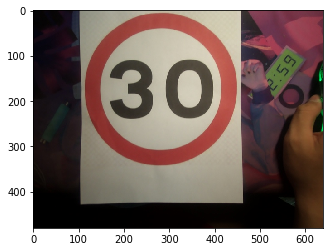

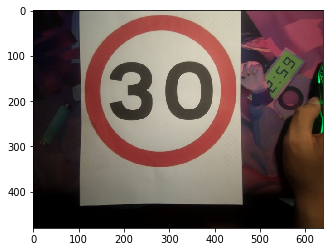

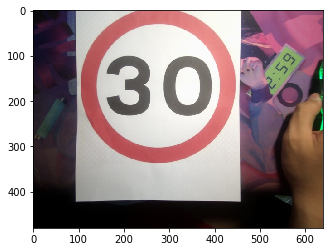

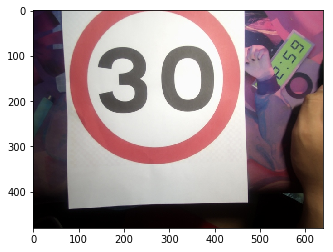

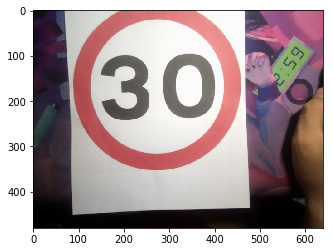

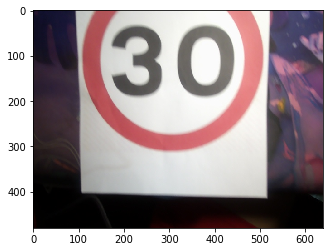

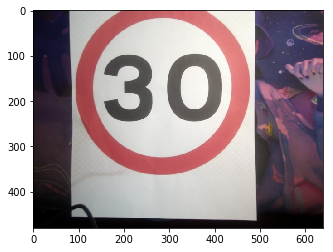

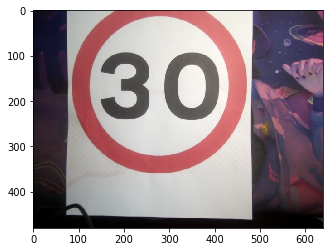

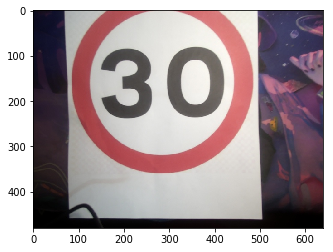

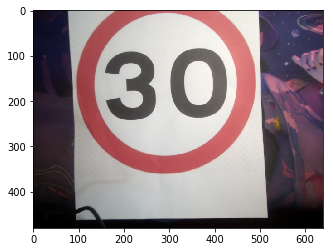

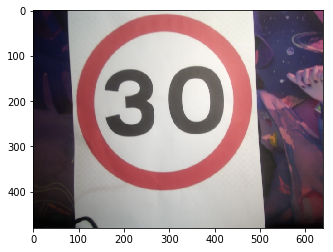

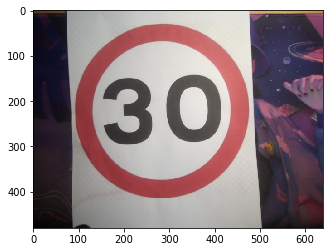

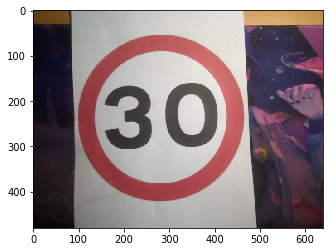

image save


In [15]:
ol = Overlay("/home/xilinx/jupyter_notebooks/pynq_conv/design_1.bit")
btns = ol.axi_gpio_1
leds = ol.axi_gpio_0
face_flag = True

frame_in_w = 640
frame_in_h = 480
# open the camera
cap = cv2.VideoCapture()
cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w)#set picture width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h)#set hight
cap.open(0)
i = 0  # Initialize eye counter
while (face_flag):
    ret, np_frame = cap.read()
    ret,test = cap.read()
    #import face data

    if(btns.register_map.GPIO_DATA.Channel_1_GPIO_DATA):  

            test=cv2.resize(test,(1024,768))
            leds.register_map.GPIO_TRI = 0  # 设置为输出
            leds.register_map.GPIO_DATA.Channel_1_GPIO_DATA = 1
            b,g,r = cv2.split(test)
            img_rgb = cv2.merge([r,g,b])
            cv2.imwrite('/home/xilinx/jupyter_notebooks/mnist/test.png',test)
            print("image save")
            #break while when detected face
            #------------------------------------------------   
            face_flag = False
            break


    # print the result picture
    get_ipython().magic('matplotlib inline') 
    plt.imshow(np_frame[:,:,[2,1,0]])
    plt.show()


    
# free cam,destroy window
cv2.destroyAllWindows()
cap.release()

* 模型初始化，导入神经网络参数。  
* 此过程较慢，需耐心等待。

In [16]:
image_path = '/home/xilinx/jupyter_notebooks/mnist/test.png'

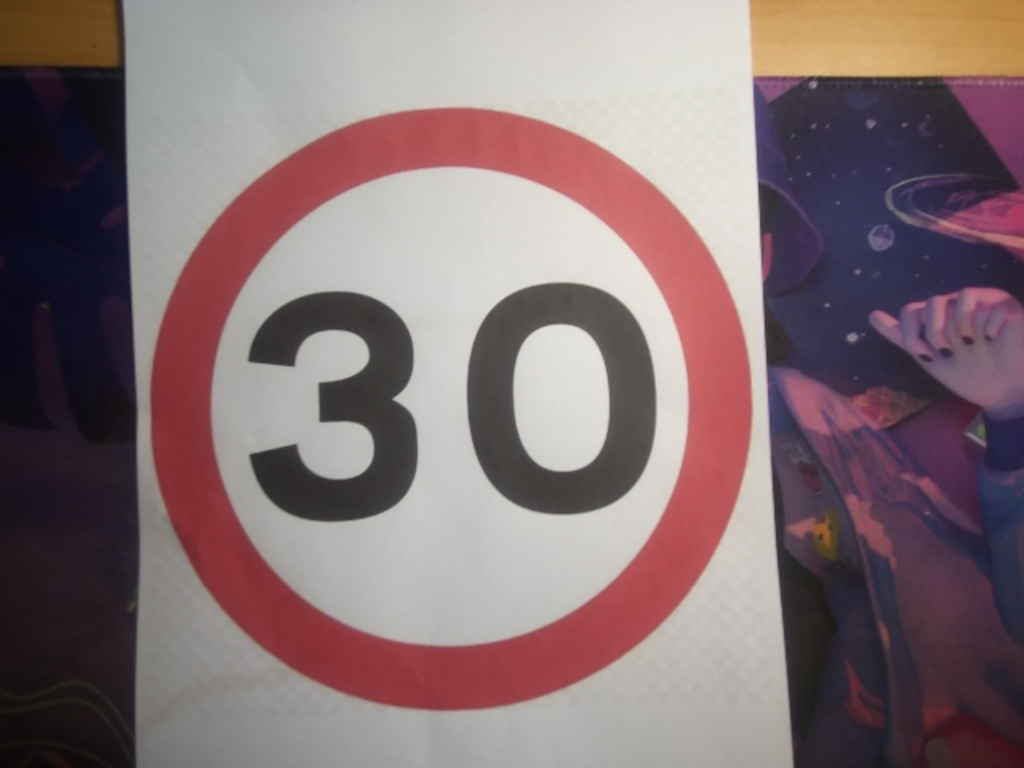

In [17]:
from IPython.display import Image
Image(filename='/home/xilinx/jupyter_notebooks/mnist/test.png')


In [18]:
sign = cnn.Sign_recog(image_path)
print(sign)

Time consuming:  0.7545430660247803
30 Km/h


* 调用函数进行判断

In [60]:
cnn.close()